**1.1. Линейные регрессионные модели**

**Линейная регрессия**

**Линейная регрессия (Linear regression)** – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

**Функция потерь — метод наименьших квадратов**

**Функция потерь** – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его фактическим значением.

Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

**Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:

*   **numpy - numpy.linalg.lstsq**
*   **scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

---




**1.1.1 Пример.**

**Задача:** Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

**Решение:**


[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


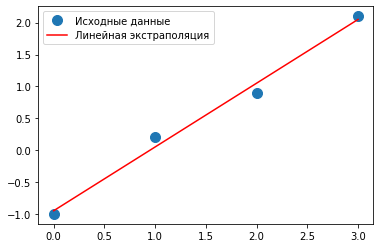

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

# Ответ: 

**1.1.2 Пример.**

**Задача:** Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома 𝑎, 𝑏, 𝑐 по методу наименьших квадратов. Данные могут быть получены в результате измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

**Решение:**

[-5.36876916 -3.7671554  -2.78509351 -1.93102175 -0.81815626 -0.38788238
  0.71313769  1.61072266  2.53790207  4.22295144  5.06022885]
[25.14757194 16.31591156  8.84955007  3.90416756  0.60362156 -0.44268529
  0.67063462  3.83445821  9.43413371 16.4944151  24.90014344]


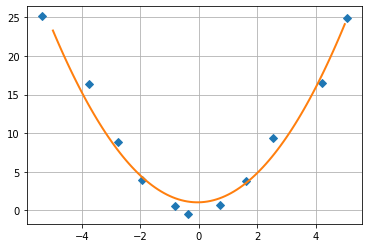

In [ ]:
from numpy import *
from numpy.random import *

# генерируем случайные x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)
# записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)
# Нахождение коэф. ф-и вида ax^2 + bx +c методом наим. квадратов.
# задаём вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(11))).T
# находим коэф. при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]
# на отрезке  [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^2 + bx +c, подставляя из решения коэф. s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

# Ответ:

**1.1.3 Пример.**

**Задача:** По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

**Решение:**

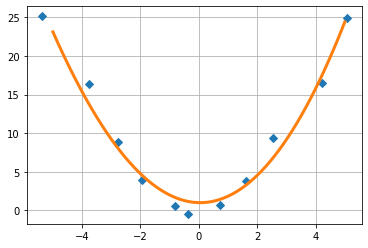

In [ ]:
# Нахождение коэф. ф-и вида y = ax^3 + bx^2 +cx + d методом наим. квадратов.
# задаём вектор m = [x**3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T
# находим коэф. при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]
# на отрезке  [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx^2 +cx + d, подставляя из решения коэф. s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

# Ответ:

**1.1.4 Пример.**

**Задача:** Необходимо проверить гипотезу, что наша точечно заданная функция  ложится на кривую вида  𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2).

**Решение:**

[0.23868569 0.7351514  0.46209489]
0.00026915457488301876
0.13987076236137758


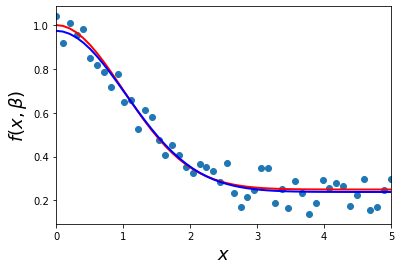

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.04018218 0.91662122 1.00988696 0.95349632 0.98264012 0.84855752
 0.81896397 0.78789198 0.71694597 0.77773256 0.65083017 0.66033836
 0.5236707  0.61128634 0.57874128 0.47566363 0.40751454 0.45075028
 0.40794655 0.35301204 0.32593215 0.36679394 0.35092383 0.33489439
 0.28587081 0.37158618 0.2335026  0.17130752 0.21376209 0.24576141
 0.34729202 0.3480608  0.18822355 0.25224907 0.16501555 0.29071953
 0.23335678 0.13866154 0.18828484 0.29

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
print(xdata)
print(ydata)

# Ответ:


**1.1.5. Пример.**

**Задача:** Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:

1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥

2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2

3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)

4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^(𝑏1)

**Решение:**


[0.2717308  0.74241331]
0.0001200832490073034
0.10559044100418266


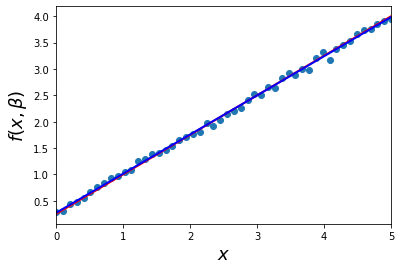

[0.2314703  0.78614927 0.49260356]
0.00011673291588409836
0.09734303177814244


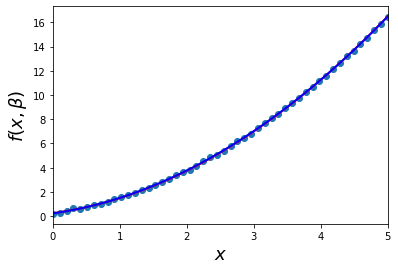

[1.02738652 1.98893282]
5.468387642886154e-05
0.12645326123420575


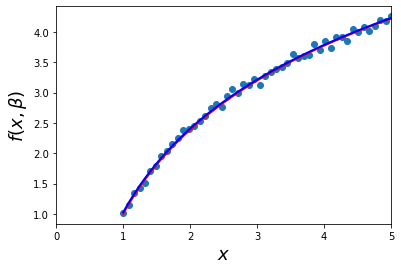

[0.99972606 1.99978777]
5.6446501111706216e-06
0.13433021237709256


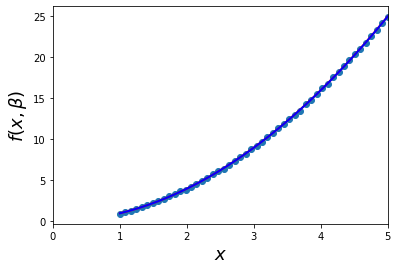

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

# 1
beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + b1 * x


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 2
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 3
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 4
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Ответ:

**Задание:** Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

**Решение:**

[0.22280826 0.75212042]
0.0004409677183817846
0.027738290193378458


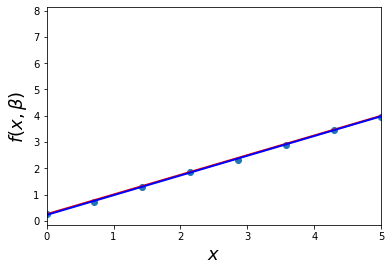

[0.29945558 0.74040784 0.50037458]
0.0014432430906594147
0.07953514222606585


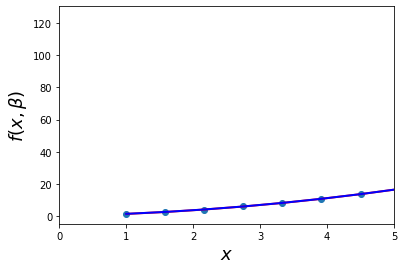

[1.02082824 1.99222759]
0.0004275677269645066
0.08314651531339924


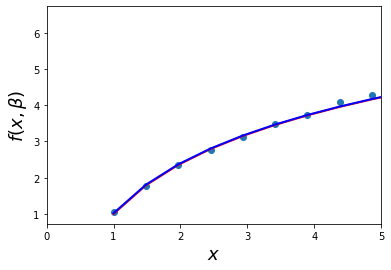

[1.0023626  1.99871408]
2.312914784217141e-06
0.05098334051745266


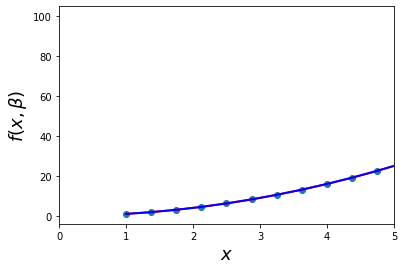

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

# 1
beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + b1 * x


xdata = np.linspace(0, 10, 15)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 2
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2


xdata = np.linspace(1, 15, 25)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 3
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 15, 30)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 4
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(1, 10, 25)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Ответ:

**1.2. Задачи регрессии.**

Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой  переменными является линейной, тогда имеем дело с множественной линейной
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.


---



**1.2.1. Пример.**

**Задача:** Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

**Решение:**


   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.787500  53.700000
std         1.507165  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.625000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


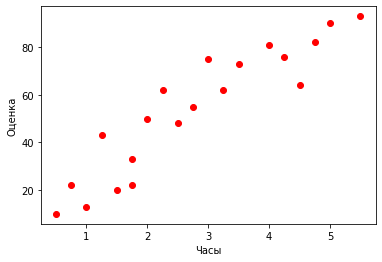

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]
   Actual  Predicted
0      90  90.610737
1      22  18.245701
2      93  99.124271
3      62  43.786302


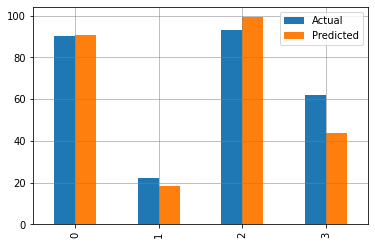

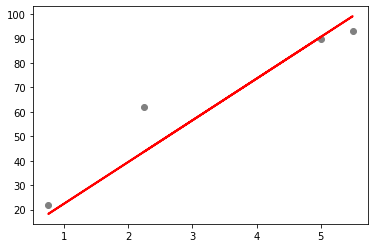

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {"Учебное время": [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75,
                             3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           "Оценка": [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
print(dataset.head())
print(dataset.shape)
print(dataset.describe())
plt.scatter(dataset["Учебное время"], dataset['Оценка'], color='r', label="Данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

# Ответ:

**Задание:** Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

**Решение:**


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


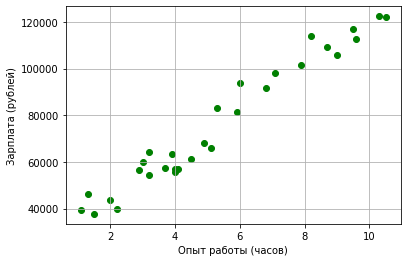

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]
     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


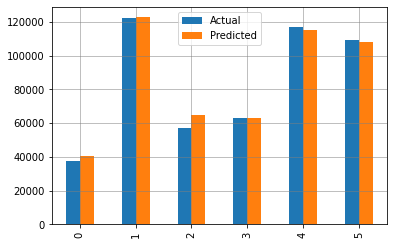

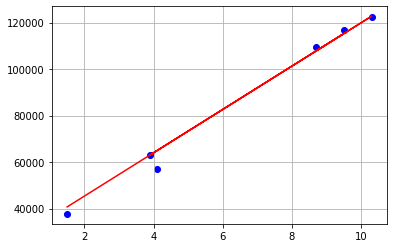

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url, sep=',')

print(dataset.head())
print(dataset.shape)
print(dataset.describe())

plt.scatter(dataset['YearsExperience'],
            dataset['Salary'],
            color='g',
            label="Данные:")

plt.xlabel("Опыт работы (часов)")
plt.ylabel("Зарплата (рублей)")
plt.grid()
plt.show()
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)
x_train, x_test, y_train, y_test =
    train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred,
         color='red',
         linewidth=1.5,
         drawstyle='default')
plt.grid()
plt.show()

# Ответ:

**1.3. Множественная регрессия.**

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных
называется **«множественной линейной регрессией»** или многомерной
линейной регрессией **Текст, выделенный полужирным шрифтом**. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой. Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.


---



**1.3.1. Пример.**

**Задача:** Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

**Решение:**


In [ ]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

x = np.transpose(x)  # transpose so input vectors
x = np.c_[x, np.ones(x.shape[0])]  # add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]

print(linreg)

# Ответ:

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


**1.3.2. Пример.**

**Задача:** Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

**Решение:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5,
     4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7,
      8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8,
      7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8,
      7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset.head())
print('')
print(dataset.shape)
print('')
print(dataset.describe())
print('')
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']
x_train, x_test, y_train, y_test =
    train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)
print('')
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test,
                   'Predicted': y_pred})
print(df)
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

# Ответ:

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6

(23, 4)

               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%     5.000000   6.500000   7.500000   7.000000
max     6.000000   9.000000   9.000000   9.000000

    Coefficient
x1     0.223219
x2     0.136709
x3    -0.063757

    Actual  Predicted
11       5   4.119478
10       4   3.153648
21       3   3.199155
14       4   4.078333
20       1   3.258079

Mean Squared Error: 1.3272699242343078


**Задание.**

**Задача:** Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

**Решение:**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/'
                  'Red-Wine-Quality/master/winequality-red.csv')
y = [url.quality]
x = [url.pH, url.alcohol, url.density]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")

print(dataset.head())
print()
print(dataset.shape)
print()
print(dataset.describe())
print()

x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test =
    train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])

print(coeff_df)
print()

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test,
                   'Predicted': y_pred})
print(df)
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

# Ответ:

   y    x1   x2      x3
0  5  3.51  9.4  0.9978
1  5  3.20  9.8  0.9968
2  5  3.26  9.8  0.9970
3  6  3.16  9.8  0.9980
4  5  3.51  9.4  0.9978

(1599, 4)

                 y           x1           x2           x3
count  1599.000000  1599.000000  1599.000000  1599.000000
mean      5.636023     3.311113    10.422983     0.996747
std       0.807569     0.154386     1.065668     0.001887
min       3.000000     2.740000     8.400000     0.990070
25%       5.000000     3.210000     9.500000     0.995600
50%       6.000000     3.310000    10.200000     0.996750
75%       6.000000     3.400000    11.100000     0.997835
max       8.000000     4.010000    14.900000     1.003690

    Coefficient
x1    -0.821542
x2     0.402203
x3    15.382387

      Actual  Predicted
1109       6   5.938915
1032       5   5.305409
1002       7   6.180197
487        6   5.617153
979        5   5.790899
...      ...        ...
794        6   6.578206
813        4   5.903352
1322       5   6.106185
704        4   5

**Задание. **

**Задача:** Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

**Решение:**

In [ ]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4.0, 4.2, 4.4, 4.6, 4.8, 5.0])
y = np.array([4.0, 3.0, 6.0, 6.0, 4.0, 4.0])

a = np.vstack([x, np.ones(len(x))]).T
m1, c1 = np.linalg.lstsq(a, y, rcond=None)[0]

print(a)
print()
print(m1)
print(c1)
print()

plt.plot(x, y, 'o', label='Initial data', markersize=7)
plt.plot(x, m1 * x + c1, 'r', label='Linear extrapolation')
# Polinom from x **2:
m2 = np.vstack([x ** 2, x, np.ones(len(x))]).T
s2 = np.linalg.lstsq(m2, y, rcond=None)[0]

print(m2)
print('')
print(s2[0])
print(s2[1])
print(s2[2])
print()

x_prec_1 = linspace(np.amin(x), np.amax(x), 101)
plt.plot(x, y, 'D')
plt.plot(x_prec_1, s2[0] * x_prec_1 ** 2 + s2[1] * x_prec_1 +
         s2[2], '-', label='Quadratic extrapolation', lw=2)
plt.grid()
# Polinom from x **3:
m3 = vstack((x ** 3, x ** 2, x, np.ones(len(x)))).T
s3: object = np.linalg.lstsq(m3, y, rcond=None)[0]

print(m3)
print()
print(s3[0])
print(s3[1])
print(s3[2])
print(s3[3])
print()

x_prec_2 = linspace(np.amin(x), np.amax(x), 101)
plt.plot(x, y, 'D')
plt.plot(x_prec_2, s3[0] * x_prec_2 ** 3 + s3[1] * x_prec_2 ** 2 +
         s3[2] * x_prec_2 + s3[3], '-', label='Cubic extrapolation', lw=3)
plt.grid()
plt.legend()
plt.show()

# Ответ: